In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
app = pd.read_pickle('/Users/krystal/Desktop/app_cleaned.pickle')
app.head()

,category,current_rating,description,id,is_InAppPurcased,is_multilingual,is_multiplatform,name,new_version_desc,num_current_rating,...,review2,review2_star,review3,review3_star,scrape_date,seller,size,update_date,url,version
0,Books,NaN,~ ~ > A m a g i c a l f a n t a s y - ...,616686830,1,0,0,The Little Mermaid - A Free Interactive Childr...,"> H e y T a b T a l e r s , g r e a t ...",NaN,...,None,NaN,None,NaN,2017-03-11,TabTale LTD,75.0 MB,"Oct 15, 2015",https://itunes.apple.com/us/app/little-mermaid...,1.4
1,Books,4.500,,445211116,1,1,0,Obeikan Store,,16.0,...,It's greet app .,5.0,None,NaN,2017-03-11,new Thinkers,32.6 MB,"Jan 06, 2014",https://itunes.apple.com/us/app/obeikan-store/...,5.0
2,Books,NaN,W e i r d & F u n n y T o n g u e T w ...,427342569,1,0,0,A-Z Tongue Twisters! The Best Fun & Funny Atte...,U s e r I n t e r f a c e i m p r o v e m ...,NaN,...,I love it,5.0,None,NaN,2017-03-11,Michael Quach,9.7 MB,"Sep 04, 2014",https://itunes.apple.com/us/app/z-tongue-twist...,2.2.5
3,Books,NaN,,462186890,1,0,0,网易云阅读-电子书城免费小说新闻一站阅读,2 0 1 7,NaN,...,,5.0,,5.0,2017-03-11,"NetEase (Hangzhou) Network Co., Ltd.",88.3 MB,"Jan 20, 2017",https://itunes.apple.com/us/app/%E7%BD%91%E6%9...,5.2.4
4,Books,4.875,i P h o n e i P a d...,952059546,1,0,0,微信读书,1 .,8.0,...,qq,4.0,1,5.0,2017-03-11,Tencent Technology (Shenzhen) Company Limited,75.4 MB,"Feb 13, 2017",https://itunes.apple.com/us/app/%E5%BE%AE%E4%B...,1.5.2


In [ ]:
app = app.drop_duplicates()


In [6]:
app.dtypes.index

Index([u'category', u'current_rating', u'description', u'id',
       u'is_InAppPurcased', u'is_multilingual', u'is_multiplatform', u'name',
       u'new_version_desc', u'num_current_rating', u'num_overall_rating',
       u'overall_rating', u'price', u'publish_date', u'review1',
       u'review1_star', u'review2', u'review2_star', u'review3',
       u'review3_star', u'scrape_date', u'seller', u'size', u'update_date',
       u'url', u'version'],
      dtype='object')

In [13]:
data_q3 = app[np.isfinite(app['current_rating']) & np.isfinite(app['is_InAppPurcased'])]

<b>Question 3 Is there any difference in app quality for free apps with in-app purchases?</b>

In [22]:
data_q3['is_InAppPurcased'].value_counts()

0    2494
1    2028
Name: is_InAppPurcased, dtype: int64

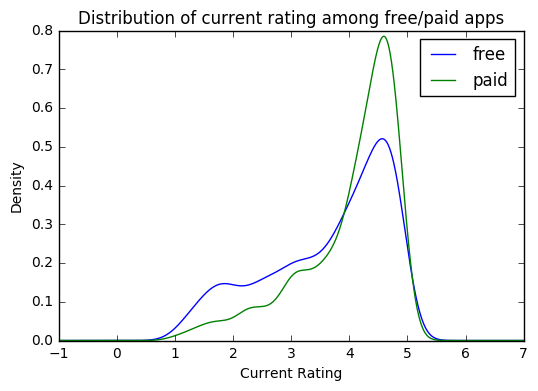

In [24]:
free = data_q3.loc[data_q3['is_InAppPurcased'] == 0]
paid = data_q3.loc[data_q3['is_InAppPurcased'] == 1]
free['current_rating'].plot(kind = "density")
paid['current_rating'].plot(kind = "density")
plt.xlabel('Current Rating')
plt.legend(labels = ['free','paid'], loc='upper right')
plt.title('Distribution of current rating among free/paid apps')
plt.show()

<p>First, the data set is splitted into two parts, one is app without in-app purchases and another is app with in-app purchases. Then the density plots for the two subsets are made and from the plots we can see that the current rating of paid app is generally higher than the overall rating of free app. Some specific tests are still needed to perform.</p>

In [25]:
import scipy.stats

In [26]:
free = list(free['current_rating'])
paid = list(paid['current_rating'])

In [27]:
print(np.mean(free))
print(np.mean(paid))

3.63937633119
4.00950073471


In [28]:
scipy.stats.ttest_ind(free, paid, equal_var = False)

Ttest_indResult(statistic=-13.064682308109811, pvalue=2.5715670717150474e-38)

<p>I perform t test here. We have two samples here, one is free apps and another is apps with in-app purchases. So I want to test whether the mean current rating for these two samples are different.</p>

<p>The null hypothesis is mean current rating for free apps and mean current rating for apps with in-app purchases are the same and the alternative hypothesis is that the mean current rating for these two samples are not the same.</p>

<p>From the result we can see that the p value is 2.5715670717150474e-38, which is smaller than 0.05, so we should reject null hypothesis at significance level 0.05, that is, we should conclude that the mean of current rating for these two samples are not the same and with in-app purchases or not do influent the rating of an app.</p>

In [29]:
scipy.stats.f_oneway(free, paid)

F_onewayResult(statistic=163.19269529840543, pvalue=9.7392843155192399e-37)

<p>I also perform one-way ANOVA test here.</p>

<p>The null hypothesis is mean current rating for free apps and mean overall rating for apps with in-app purchases are the same and the alternative hypothesis is that the mean current rating for these two samples are not the same.</p>

<p>From the result we can see that the p value is 9.7392843155192399e-37, which is smaller than 0.05, so we should reject null hypothesis at significance level 0.05, that is, we should conclude that the mean of current rating for these two samples are not the same and with in-app purchases or not do influent the rating of an app.</p>

In [30]:
scipy.stats.kruskal(free, paid)

KruskalResult(statistic=127.88342720527469, pvalue=1.1903303041683057e-29)

<p>I perform Kruskal-Wallis H-test here, which is a non-parametric version of ANOVA. Since t test and one-way ANOVA test all need assumption that the samples shoule come from a normally distributed population, here we use this test, which do not need these assumptions but will lose some power.</p>

<p>The null hypothesis is mean current rating for free apps and mean current rating for apps with in-app purchases are the same and the alternative hypothesis is that the mean current rating for these two samples are not the same.</p>

<p>From the result we can see that the p value is 1.1903303041683057e-29, which is smaller than 0.05, so we should reject null hypothesis at significance level 0.05, that is, we should conclude that the mean of current rating for these two samples are not the same and with in-app purchases or not do influent the rating of an app.</p>

<b>In general, from the results in these three tests, we can conclude that whether providing in-app purchases can influent the rating of an app and the association needs further exploration.</b>